# **`pycoco`** calling **`CoCo`**

___

## Brief description of operation
___

lcfit, specfit, specphase, lcsim

![flowchart](data/pycoco_flowchart.png)


## Introduction

---
**`pycoco.coco_calls`**

In [1]:
# %matplotlib notebook
%matplotlib inline

from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

# Run Light Curve Fits
___
## Individual SNe
First test - let's load in the photometry to a SN object, see if you have a fit for SN2006aj and plot the light curve.

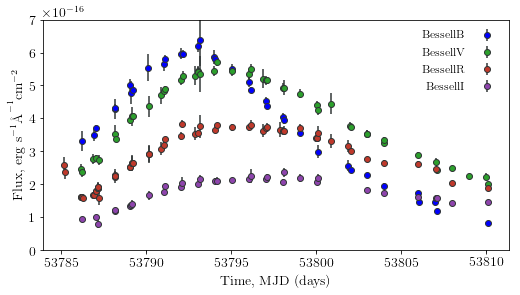

True

In [2]:
snname = "SN2006aj"
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)

sn.plot_lc(multiplot=False)
pcc.coco.test_LCfit(snname)

Let's try running a fit anyway:

In [ ]:
pcc.coco.run_LCfit(snname+".dat") ## This will look for a file called SN2006aj.dat in the current working directory

Unless you had the file in here, this probably threw a warning. To run, it is best to give the explicit path to the file you want to fit, like so.

In [ ]:
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"))

Great, let's take a look at what we have.

In [ ]:
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

## All SNe as Batch
___

You can run using a file input containing a list of the lightcurves. 

In [ ]:
lclist_path = os.path.join(pcc.defaults._default_coco_dir_path, "examples/lc.list")

with open(lclist_path, "r") as f:
    print(f.read())

In [ ]:
# run_all = True
run_all = False

if run_all:                                  ## This can take a while!
    pcc.coco.run_LCfit_fileinput(lclist_path)
    print("Done.")

## Call Specfit
---
specfitting takes the list of spectra that lives in `COCO_ROOT_DIR/lists/` and adjusts their fluxes, by multiplying them by a cubic spline, so that their spectrophotometric flux matches that of the light curves we have just done at their observed MJD. 

### individual speclists

In [3]:
pcc.coco.test_specfit(sn.name)

True

In [6]:
pcc.coco.specfit_sn(SNobject=sn, overwrite=True)

['BessellB', 'BessellI', 'BessellR', 'BessellV']
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_m.dat
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53786.270000.spec
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53787.230000.spec
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53788.200000.spec
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53789.170000.spec
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53790.140000.spec
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53791.100000.spec
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53792.070000.spec
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53793.040000.spec
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53794.010000.spec
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53794.970000.spec
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53795.940000.spec
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53796.910000.spec
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53797.880000.spec
Overwriting

## All Speclists
___

In [ ]:
# specfit_all = True
specfit_all = False
if specfit_all:           ## This also might take a while!
    pcc.coco.specfit_all()

# Specphase

In [7]:
phase_path = os.path.join(pcc.defaults._default_coco_dir_path, "examples/phase.list")
pcc.coco.run_specphase("BessellV", phase_path)

current list.txt is up to date. re run with force = True to force.
